# Predicting Neurodegeneration from Speech

## Hypothesis
The duration of pauses in speech will be longer for Parkinson's Disorder (PD) and REM Behaviour Disorder (RBD) patients compared to the healthy controls (HC). This reflects difficulties in speech initiation and continuation and could indicate early onset of Parkinson's Disorder.

Dataset: https://archive.ics.uci.edu/dataset/392/early+biomarkers+of+parkinson+s+disease+based+on+natural+connected+speech

Paper: 
https://www.nature.com/articles/s41598-017-00047-5

## Variables of Interest:

### Duration of Pause Intervals (ms) 
- This measures the actual length of the pauses during speech.

### Gaping in-between Voiced Intervals (-/min) 
- This indicates the frequency of pauses which can be important for the duration measurement.

### Pause Intervals per Respiration (-)
- Measures how often pauses occur in the context of the breathing cycle, which could be related to speech initiation difficulties.

### Latency of Respiratory Exchange (ms) 
- Not exactly about speech pauses but could be related to the control of speech initiation and pauses.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df_parkinsons = pd.read_csv('dataset.csv')

In [3]:
df_parkinsons.head()

,Unnamed: 0,Demographic information,Demographic information.1,Clinical information,Clinical information.1,Clinical information.2,Medication,Medication.1,Medication.2,Medication.3,...,Speech examination: speaking task of monologue.2,Speech examination: speaking task of monologue.3,Speech examination: speaking task of monologue.4,Speech examination: speaking task of monologue.5,Speech examination: speaking task of monologue.6,Speech examination: speaking task of monologue.7,Speech examination: speaking task of monologue.8,Speech examination: speaking task of monologue.9,Speech examination: speaking task of monologue.10,Speech examination: speaking task of monologue.11
0,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voic...,Duration of unvoiced stops (ms),Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms)
1,PD01,58,F,No,56,2,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6,13.81,127
2,PD02,68,F,No,67,1,No,No,No,No,...,8.2,295,264,40.56,26.88,-0.825,-23.26,4,21.77,313
3,PD03,68,M,No,67,1,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4,22.52,201
4,PD04,75,M,No,73,2,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2,14.37,151


In [4]:
df_parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 65 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unnamed: 0                                               131 non-null    object
 1   Demographic information                                  131 non-null    object
 2   Demographic information.1                                131 non-null    object
 3   Clinical information                                     131 non-null    object
 4   Clinical information.1                                   131 non-null    object
 5   Clinical information.2                                   131 non-null    object
 6   Medication                                               131 non-null    object
 7   Medication.1                                             131 non-null    object
 8   Medication.2                            

In [5]:
# Combine the first row with the header

def create_combined_header(df_parkinsons):
    new_header = [str(i) + ' ' + str(j) for i, j in zip(df_parkinsons.columns, df_parkinsons.iloc[0])]
    df_parkinsons.columns = new_header
    df_parkinsons = df_parkinsons.drop(df_parkinsons.index[0])
    df_parkinsons.reset_index(drop=True, inplace=True)
    
    return df_parkinsons

df_parkinsons = create_combined_header(df_parkinsons)

In [6]:
df_parkinsons.head()

,Unnamed: 0 Participant code,Demographic information Age (years),Demographic information.1 Gender,Clinical information Positive history of Parkinson disease in family,Clinical information.1 Age of disease onset (years),Clinical information.2 Duration of disease from first symptoms (years),Medication Antidepressant therapy,Medication.1 Antiparkinsonian medication,Medication.2 Antipsychotic medication,Medication.3 Benzodiazepine medication,...,Speech examination: speaking task of monologue.2 Acceleration of speech timing (-/min2),Speech examination: speaking task of monologue.3 Duration of pause intervals (ms),Speech examination: speaking task of monologue.4 Duration of voiced intervals (ms),Speech examination: speaking task of monologue.5 Gaping in-between voiced\nintervals (-/min),Speech examination: speaking task of monologue.6 Duration of unvoiced stops (ms),Speech examination: speaking task of monologue.7 Decay of unvoiced fricatives (?/min),Speech examination: speaking task of monologue.8 Relative loudness of respiration (dB),Speech examination: speaking task of monologue.9 Pause intervals per respiration (-),Speech examination: speaking task of monologue.10 Rate of speech respiration (- /min),Speech examination: speaking task of monologue.11 Latency of\nrespiratory exchange (ms)
0,PD01,58,F,No,56,2,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6,13.81,127
1,PD02,68,F,No,67,1,No,No,No,No,...,8.2,295,264,40.56,26.88,-0.825,-23.26,4,21.77,313
2,PD03,68,M,No,67,1,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4,22.52,201
3,PD04,75,M,No,73,2,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,...,11.77,206,480,33.54,26.87,0.075,-22.32,5,14.61,151


In [7]:
# Remove extra spaces from column names

def clean_column_names(df_parkinsons):
    df_parkinsons.columns = df_parkinsons.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
    return df_parkinsons

In [8]:
# Convert columns of interest to numeric values so that I can analze and plot them

def clean_and_convert_to_numeric(df_parkinsons, columns_to_convert):
    df_parkinsons = clean_column_names(df_parkinsons)

    for col in columns_to_convert:
        df_parkinsons[col] = pd.to_numeric(df_parkinsons[col].astype(str).str.replace(r'[^\d.]+', '', regex=True), errors='coerce')
    return df_parkinsons

columns_to_convert = ['Demographic information Age (years)', 'Clinical information.1 Age of disease onset (years)', 
                      'Clinical information.2 Duration of disease from first symptoms (years)', 
                      'Speech examination: speaking task of reading passage.3 Duration of pause intervals (ms)', 
                      'Speech examination: speaking task of reading passage.5 Gaping in-between voiced intervals (-/min)', 
                      'Speech examination: speaking task of reading passage.11 Latency of respiratory exchange (ms)', 
                      'Speech examination: speaking task of reading passage.9 Pause intervals per respiration (-)', 
                      'Speech examination: speaking task of monologue.3 Duration of pause intervals (ms)', 
                      'Speech examination: speaking task of monologue.5 Gaping in-between voiced intervals (-/min)', 
                      'Speech examination: speaking task of monologue.9 Pause intervals per respiration (-)', 
                      'Speech examination: speaking task of monologue.11 Latency of respiratory exchange (ms)'] 

df_parkinsons = clean_and_convert_to_numeric(df_parkinsons, columns_to_convert)

In [9]:
df_parkinsons.describe()

,Demographic information Age (years),Clinical information.1 Age of disease onset (years),Clinical information.2 Duration of disease from first symptoms (years),Speech examination: speaking task of reading passage.3 Duration of pause intervals (ms),Speech examination: speaking task of reading passage.5 Gaping in-between voiced intervals (-/min),Speech examination: speaking task of reading passage.9 Pause intervals per respiration (-),Speech examination: speaking task of reading passage.11 Latency of respiratory exchange (ms),Speech examination: speaking task of monologue.3 Duration of pause intervals (ms),Speech examination: speaking task of monologue.5 Gaping in-between voiced intervals (-/min),Speech examination: speaking task of monologue.9 Pause intervals per respiration (-),Speech examination: speaking task of monologue.11 Latency of respiratory exchange (ms)
count,130.000000,80.000000,80.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.00000
mean,64.330769,60.750000,4.212500,166.646154,53.262846,5.571154,134.630769,229.069231,45.089692,4.457692,145.20000
std,10.133518,10.726166,4.059163,46.487618,15.606155,2.417282,63.367164,79.696828,12.522043,1.791490,85.20749
min,34.000000,30.000000,0.500000,96.000000,13.720000,1.000000,10.000000,117.000000,14.680000,1.500000,15.00000
25%,58.250000,56.000000,1.000000,138.250000,42.712500,4.000000,89.000000,177.000000,36.987500,3.000000,90.50000
50%,66.500000,62.500000,2.750000,156.000000,52.675000,5.250000,124.500000,212.500000,44.420000,4.000000,127.50000
75%,72.000000,68.250000,5.000000,185.000000,62.945000,6.500000,167.000000,263.250000,53.532500,5.000000,176.25000
max,83.000000,81.000000,17.000000,388.000000,109.500000,18.500000,441.000000,611.000000,74.160000,13.500000,593.00000


In [10]:
# Compare mean for the duration of pause intervals for each group (PD, RBD, HC)

df_parkinsons['Group'] = df_parkinsons['Unnamed: 0 Participant code'].str.extract(r'(\D+)')
mean_pause_durations_reading = df_parkinsons.groupby('Group')['Speech examination: speaking task of reading passage.3 Duration of pause intervals (ms)'].mean()

mean_pause_durations_reading

Group
HC     149.820000
PD     186.066667
RBD    171.820000
Name: Speech examination: speaking task of reading passage.3 Duration of pause intervals (ms), dtype: float64

In [11]:
df_parkinsons['Group'] = df_parkinsons['Unnamed: 0 Participant code'].str.extract(r'(\D+)')
mean_pause_durations_monologue = df_parkinsons.groupby('Group')['Speech examination: speaking task of monologue.3 Duration of pause intervals (ms)'].mean()

mean_pause_durations_monologue

Group
HC     198.36
PD     264.90
RBD    238.28
Name: Speech examination: speaking task of monologue.3 Duration of pause intervals (ms), dtype: float64

In [12]:
df_parkinsons2 = df_parkinsons.rename(columns={
    'Speech examination: speaking task of monologue.3 Duration of pause intervals (ms)': 'Monologue: Pause',
    'Speech examination: speaking task of reading passage.3 Duration of pause intervals (ms)': 'Reading: Pause',
    'Demographic information Age (years)': 'Age', 
    'Clinical information.1 Age of disease onset (years)': 'Age Onset', 
    'Clinical information.2 Duration of disease from first symptoms (years)': 'Duration of disease from 1st symptoms',   
    'Speech examination: speaking task of reading passage.5 Gaping in-between voiced intervals (-/min)': 'Reading:Gaping', 
    'Speech examination: speaking task of reading passage.9 Pause intervals per respiration (-)': 'Reading: Pause/Respiration',
    'Speech examination: speaking task of reading passage.11 Latency of respiratory exchange (ms)': 'Reading: Latency',   
    'Speech examination: speaking task of monologue.5 Gaping in-between voiced intervals (-/min)': 'Monologue: Gaping', 
    'Speech examination: speaking task of monologue.9 Pause intervals per respiration (-)': 'Monologue: Pause/Respiration', 
    'Speech examination: speaking task of monologue.11 Latency of respiratory exchange (ms)': 'Monologue: Latency'
})

array([[<Axes: title={'center': 'Monologue: Pause'}>,
        <Axes: title={'center': 'Reading: Pause'}>]], dtype=object)

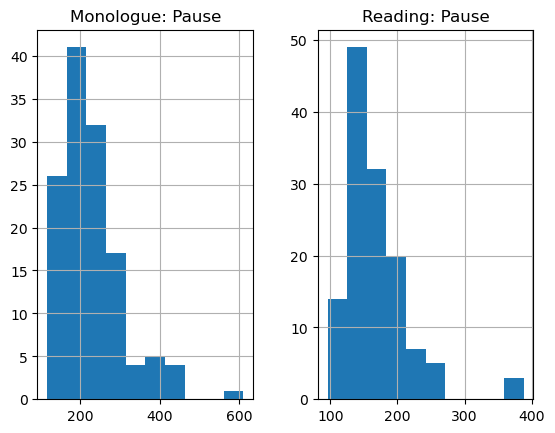

In [13]:
df_parkinsons2[['Monologue: Pause', 'Reading: Pause']].hist()

In [14]:
import scipy.stats as stats

monologue_pause_data = df_parkinsons2.groupby('Group')['Monologue: Pause'].apply(list)
reading_pause_data = df_parkinsons2.groupby('Group')['Reading: Pause'].apply(list)

monologue_pause_lists = monologue_pause_data.tolist()
reading_pause_lists = reading_pause_data.tolist()

# Perform Kruskal-Wallis H-test since this is not a normal distribution
h_value_monologue, p_value_monologue = stats.kruskal(*monologue_pause_lists)
h_value_reading, p_value_reading = stats.kruskal(*reading_pause_lists)

print('Kruskal-Wallis H-test results for Monologue: Pause: H-value =', h_value_monologue, 'P-value =', p_value_monologue)
print('Kruskal-Wallis H-test results for Reading: Pause: H-value =', h_value_reading, 'P-value =', p_value_reading)

Kruskal-Wallis H-test results for Monologue: Pause: H-value = 15.376860885620937 P-value = 0.0004580966166055088
Kruskal-Wallis H-test results for Reading: Pause: H-value = 11.519228983068452 P-value = 0.003152326612826359


In [15]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [16]:
import scikit_posthocs as sp

groups = df_parkinsons2['Group'].values
monologue_data = df_parkinsons2['Monologue: Pause'].values

unique_groups = np.unique(groups)

# Post hoc pairwise test using Dunn's test
posthoc_monologue = sp.posthoc_dunn([monologue_data[groups == g] for g in np.unique(groups)])

posthoc_monologue.columns = unique_groups
posthoc_monologue.index = unique_groups

# Post hoc test for 'Reading: Pause'
reading_data = df_parkinsons2['Reading: Pause'].values

# Post hoc pairwise test using Dunn's test
posthoc_reading = sp.posthoc_dunn([reading_data[groups == g] for g in np.unique(groups)])

posthoc_reading.columns = unique_groups
posthoc_reading.index = unique_groups

print('Post hoc Dunn’s test for Monologue: Pause')
print(posthoc_monologue)

print('Post hoc Dunn’s test for Reading: Pause')
print(posthoc_reading)

Post hoc Dunn’s test for Monologue: Pause
           HC        PD       RBD
HC   1.000000  0.000459  0.001906
PD   0.000459  1.000000  0.415083
RBD  0.001906  0.415083  1.000000
Post hoc Dunn’s test for Reading: Pause
           HC        PD       RBD
HC   1.000000  0.001188  0.020906
PD   0.001188  1.000000  0.214410
RBD  0.020906  0.214410  1.000000


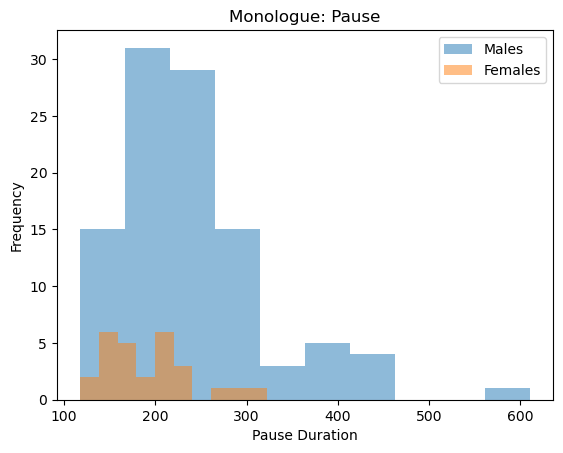

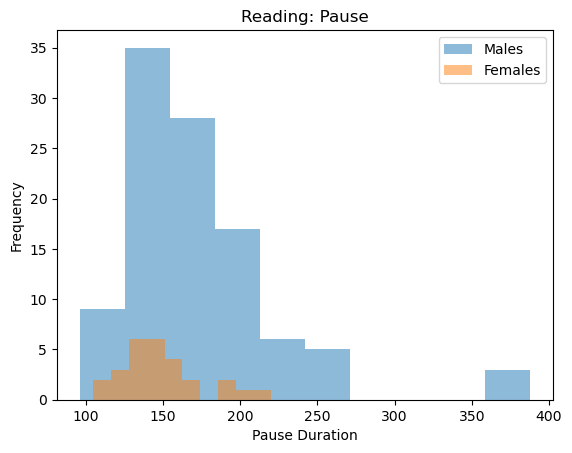

In [17]:
import matplotlib.pyplot as plt

males = df_parkinsons2[df_parkinsons2['Demographic information.1 Gender'] == 'M']
females = df_parkinsons2[df_parkinsons2['Demographic information.1 Gender'] == 'F']

plt.hist(males['Monologue: Pause'], alpha=0.5, label='Males')
plt.hist(females['Monologue: Pause'], alpha=0.5, label='Females')
plt.legend()
plt.title('Monologue: Pause')
plt.xlabel('Pause Duration')
plt.ylabel('Frequency')
plt.show()

plt.hist(males['Reading: Pause'], alpha=0.5, label='Males')
plt.hist(females['Reading: Pause'], alpha=0.5, label='Females')
plt.legend()
plt.title('Reading: Pause')
plt.xlabel('Pause Duration')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(f"Males: {males.count()}")
print(f"Females: {females.count()}")

Males: Unnamed: 0 Participant code                                                               103
Age                                                                                       103
Demographic information.1 Gender                                                          103
Clinical information Positive history of Parkinson disease in family                      103
Age Onset                                                                                  62
                                                                                         ... 
Speech examination: speaking task of monologue.8 Relative loudness of respiration (dB)    103
Monologue: Pause/Respiration                                                              103
Speech examination: speaking task of monologue.10 Rate of speech respiration (- /min)     103
Monologue: Latency                                                                        103
Group                                                

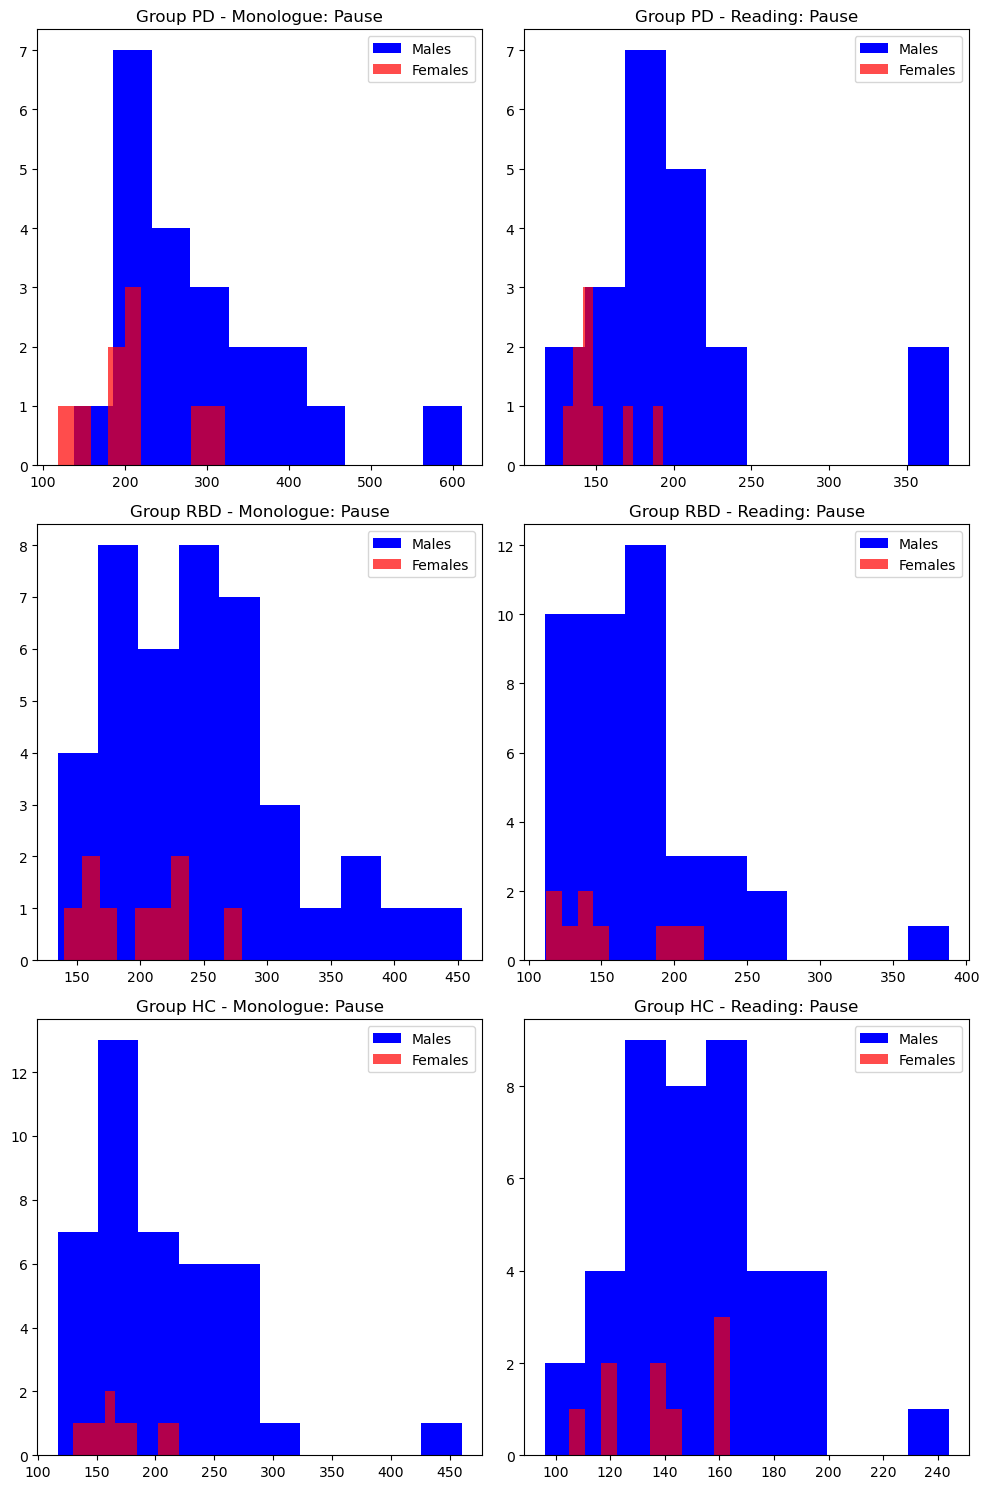

In [19]:
groups = df_parkinsons2['Group'].unique()

fig, axes = plt.subplots(nrows=len(groups), ncols=2, figsize=(10, 5 * len(groups)))

for i, group in enumerate(groups):
    group_data = df_parkinsons2[df_parkinsons2['Group'] == group]
    males = group_data[group_data['Demographic information.1 Gender'] == 'M']
    females = group_data[group_data['Demographic information.1 Gender'] == 'F']
    
    # Plot Monologue: Pause duration for Males and Females
    axes[i, 0].hist(males['Monologue: Pause'], color='blue', label='Males', density=False) 
    axes[i, 0].hist(females['Monologue: Pause'], color='red', label='Females', density=False, alpha=0.7)
    
    # Plot Reading: Pause duration for Males and Females
    axes[i, 1].hist(males['Reading: Pause'], color='blue', label='Males', density=False)
    axes[i, 1].hist(females['Reading: Pause'], color='red', label='Females', density=False, alpha=0.7)
    
    axes[i, 0].set_title(f'Group {group} - Monologue: Pause')
    axes[i, 1].set_title(f'Group {group} - Reading: Pause')
    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

## Conclusions from the plots above
### PD - Parkinson's Disease
    - Monologue: Males in this group tend to have a wider range of pause durations, with a significant number of pauses around the 100-200 ms range. Females have fewer pauses, and their distribution is narrower, primarily clustered in the 100-200 ms range as well.
    - Reading: Both males and females have pauses mostly under 200 ms. Males seem to have a slightly wider distribution than females, with a few pauses extending up to around 350 ms.

### RBD - REM Sleep Behaviour Disorder
    - Monologue: For males, pause durations are more spread out with the most common pause durations falling between 150-250 ms. Females have fewer pauses, and they are mostly concentrated in the lower duration range.
    - Reading: Males show a more uniform distribution with a wide range of pause durations. Females have a smaller number of pauses, with durations mainly under 200 ms.
    
### HC - Healthy Control
    - Monologue: Males have a broad range of pause durations, with a significant number around 100-200 ms, but with a distribution that also extends to higher durations. Females have fewer pauses, with durations mostly under 300 ms.
    - Reading: Males exhibit a wide distribution of pause durations, though less than in the monologue task. Females show fewer pauses, with most under 150 ms.

In [20]:
df_parkinsons.corr(numeric_only=True)

,Demographic information Age (years),Clinical information.1 Age of disease onset (years),Clinical information.2 Duration of disease from first symptoms (years),Speech examination: speaking task of reading passage.3 Duration of pause intervals (ms),Speech examination: speaking task of reading passage.5 Gaping in-between voiced intervals (-/min),Speech examination: speaking task of reading passage.9 Pause intervals per respiration (-),Speech examination: speaking task of reading passage.11 Latency of respiratory exchange (ms),Speech examination: speaking task of monologue.3 Duration of pause intervals (ms),Speech examination: speaking task of monologue.5 Gaping in-between voiced intervals (-/min),Speech examination: speaking task of monologue.9 Pause intervals per respiration (-),Speech examination: speaking task of monologue.11 Latency of respiratory exchange (ms)
Demographic information Age (years),1.000000,0.924583,-0.043365,0.150704,-0.040036,-0.183567,-0.065964,0.023392,0.105468,-0.026765,-0.027783
Clinical information.1 Age of disease onset (years),0.924583,1.000000,-0.420354,0.152678,-0.096822,-0.060376,0.050638,0.085748,0.059391,0.052069,0.011309
Clinical information.2 Duration of disease from first symptoms (years),-0.043365,-0.420354,1.000000,-0.095190,-0.044549,-0.042682,-0.000759,-0.078771,0.001050,-0.077490,-0.022594
Speech examination: speaking task of reading passage.3 Duration of pause intervals (ms),0.150704,0.152678,-0.095190,1.000000,-0.495238,-0.552005,0.171923,0.435916,-0.364782,-0.372317,0.052435
Speech examination: speaking task of reading passage.5 Gaping in-between voiced intervals (-/min),-0.040036,-0.096822,-0.044549,-0.495238,1.000000,0.571329,0.065904,-0.282670,0.567313,0.411535,0.095305
Speech examination: speaking task of reading passage.9 Pause intervals per respiration (-),-0.183567,-0.060376,-0.042682,-0.552005,0.571329,1.000000,0.177048,-0.261164,0.324800,0.388697,0.079060
Speech examination: speaking task of reading passage.11 Latency of respiratory exchange (ms),-0.065964,0.050638,-0.000759,0.171923,0.065904,0.177048,1.000000,0.101624,0.086871,0.086994,0.291898
Speech examination: speaking task of monologue.3 Duration of pause intervals (ms),0.023392,0.085748,-0.078771,0.435916,-0.282670,-0.261164,0.101624,1.000000,-0.541767,-0.635359,0.562429
Speech examination: speaking task of monologue.5 Gaping in-between voiced intervals (-/min),0.105468,0.059391,0.001050,-0.364782,0.567313,0.324800,0.086871,-0.541767,1.000000,0.587418,-0.089648
Speech examination: speaking task of monologue.9 Pause intervals per respiration (-),-0.026765,0.052069,-0.077490,-0.372317,0.411535,0.388697,0.086994,-0.635359,0.587418,1.000000,-0.117710


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# independent variables / predictors
X = df_parkinsons2[['Reading:Gaping', 'Reading: Pause/Respiration', 
                    'Reading: Latency']]

# dependent variable
y = df_parkinsons2['Reading: Pause']

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.42278765938442864


In [22]:
# independent variables / predictors
X2 = df_parkinsons2[['Monologue: Gaping', 'Monologue: Pause/Respiration', 
                    'Monologue: Latency']]

# dependent variable
y2 = df_parkinsons2['Monologue: Pause']

model2 = LinearRegression()
model2.fit(X2,y2)
y_pred2 = model2.predict(X2)

r = r2_score(y2, y_pred2)
print(f'R^2 Score: {r2}')

R^2 Score: 0.42278765938442864
